# Lab 7 - Op-amp introduction
### PHYS 222, Spring 2022, Dr. Ben Zwickl

### Goals
* **Build a 10x inverting amplifier**
    * Learn how to hook up a UA741 Op-amp
* **Observe performance limitatations**
    * Saturation (clipping)
    * Slew rate (how fast the voltage can change)
    * Bandwidth of the amplifier
    * Gain bandwidth product
* **CircuitLab simulation** of the 10x inverting amplifier

    


In [1]:
# load packages at the top of your notebook. 
# We will always use numpy and matplotlib.pyplot.
# In future weeks, you should add these lines yourself

import numpy as np
import matplotlib.pyplot as plt

# Task 1: Copy your `load_waveform` function from Lab 3

**Insert cell or cells below to record your answers**

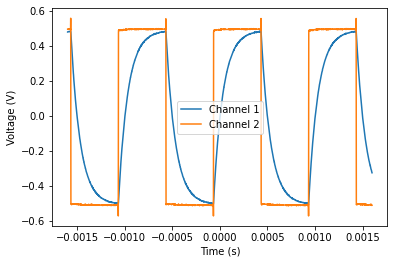

In [3]:
# RUN THESE TEST CASES BUT DON'T EDIT THEM

### Test cases for load_waveform
data = load_waveform("Sample_Scopy_Data.csv")
assert len(data) == 3        # make sure the function returns a list of 3 things
t, ch1, ch2 = data            # unpack for analysis
assert len(t) == len(ch1) == len(ch2) == 3200  # check length of imported data set
assert abs(ch1.mean() - -0.0033719303437499894)/-0.0033719303437499894 < 1e-4  # check the values on ch1
assert (np.mean( np.abs(ch2) ) - 0.5011812406249)/ 0.5011812406249 < 1e-4  # check the values on ch2
assert abs( (t.min() - (-0.0016)) ) /abs(-0.0016) < 1e-4   # check the min time

# Task 2: Build the 10x inverting amplifier op-amp circuit

This lab uses a general purpose op-amp, the Texas Instruments UA741. You can download the full [data sheet and specifications](https://www.ti.com/lit/ds/symlink/ua741.pdf) from TI. 

![10x inverting amplified schematic](Fig_Lab7_Task2.png)

**This circuit uses 5 out of the 8 pins:**
* In+, labeled +  on the schematic, is the "non-inverting input"
* In-, labeled - on the schematic, is the "inverting input"
* Out, is the output
* VCC+ is the positive supply voltage. In our case, the M2K V1 (red wire) is set to +5V
* VCC- is the negative supply voltage. In our case, the M2K V2 (white wire) is set to -5V

![TI-741 Pin diagram](Diagram_741_op_amp_pins.PNG)

#### Subtasks
1. Build the circuit
1. For a test of the G = -10 amplifier, use a 1 kHz sine wave with Vpp = 100 mV. Plot both the input and output signals and make sure the gain is approximately -10x.
1. Import a data set and plot in your notebook. 
1. Calculate the magnitude of the **gain** based on your imported data. You can use `np.std` to characterize the root-mean-squared (RMS) amplitude of the input and output. 

#### Video tutorial
* If you want to see Dr. Zwickl build a similar circuit, you can [watch a video](https://youtu.be/nvzttptphLk).

**Insert cell or cells below to record your answers**

# Task 3: Saturation of the output 

The -10x amplifier can't output arbitrarily large voltages. In fact, The output cannot exceed the supply voltages, v1 (VCC+) and V2 (VCC-).
1. For an input signal of 1 Vpp, make a plot of the output waveform. 
1. What are the most positive and most negative voltages in the output?  These are known as the saturation voltages.
1. How does the saturation voltage compare to the power supply voltages VCC+ and VCC-?
**Insert cell or cells below to record your answers**

# Task 4: Slew rate

Real world op-amps can't change their voltage arbitrarily fast. The maximum rate (often specified in volts per microsecond) is known as the slew rate of the op-amp. According to the UA741 data sheet, the slew rate is around 0.5 V/$\mu$s = 500,000 V/s. However the data sheet test circuit was a gain = 1 amplifier, so your measured slew rate could be different by a factor of 2 or more.

1. Change the input to a **square wave** (It is the waveform with fastest rise/fall time). 
1. Set amplitude to something larger than 100 mVpp, but don't saturate the output. 
1. If you set the frequency higher, between 20 kHz - 100 kHz, you should start to see behavior where the amplifier clearly doesn't reproduce the square wave. It is most noticable at higher frequencies. 
1. Import and plot a data set that shows the slew rate.
1. In Scopy, use cursors or any other method to measure the slope. The "track" cursors can give both a $\Delta x$ and $\Delta y$ with one measurement.

**Insert cell or cells below to record your answers**

# Task 5: Gain vs frequency (for 10x inverting)

The inverting amplifier works well at lower frequencies, but not so well at high frequenices. This task will characterize the frequency response of the inverting amplifier.

1. Similar to Lab 5, use the **Network Analyzer** feature of the Scopy software to generate a Bode plot of gain and phase.
    1. See these [images of the Scopy Network Analyzer settings](Scopy_Network_Analyzer_settings.png) if you are sure how to access it.
    1. Set the Reference channel to whichever channel is the input.
    1. Amplitude can be around 200 mV. This is the amplitude of $V_\textrm{in}$ and is kept constant as the frequency is varied. 
    1. Pick stop and start frequencies to cover around 100 Hz to 1 MHz.
    1. Make sure your "Samples Count", which sets the numstep size is small enough to generate a smooth Bode plot, but not so long it takes too long to obtain a data set.
    1. **Save** the CSV of the gain and phase data .
    1. **Import** your CSV of the Bode plot and **plot your data in Python** (again, similar to Lab 5).
1. Based on the graph, determine the 3 dB frequency, which is where the gain decreases below the ideal (low-frequency) gain by 3 dB. This corresponds to 1/2 power or $1/\sqrt{2} \approx 0.707$ times amplitude of the low frequency gain.
1. Determine the gain-bandwidth product, which is the product of the 3 dB frequency and the gain at that same frequency (as a multiplier, not as dB). 
    * The data sheet shows a gain-bandwidth product of about 1 MHz. How does your data compare?
1. What is the phase shift between input and output for a frequency well below the 3 dB point (e.g., 1 kHz) and a frequency well above (e.g., 200 kHz)?

**Insert cell or cells below to record your answers**

# Task 6: Gain vs frequency for the 21x inverting amplifier. 

Replace the 47 kOhm resistor with a 100k Ohm resistor. This should increase the low-frequency gain from 10x to 100k / 4.7k = 21x. In other words, with the new resistor the circuit should have double the voltage gain of the other circuit. However, this should decrease the bandwidth of the amplifier by the same ratio (i.e., bandwidth cut in half). 

The data collection and analysis is almost identical to Task 5, however, you don't need to take phase measurements. Much of the analysis code is very similar between Tasks 5 and 6 so reuse what makes sense.

1. Take data and make plots in Python similar to Task 5. 
1. Based on the graph, determine the 3 dB frequency, which is where the gain is decreased from low-frequency gain by 3 dB). This corresponds to 1/2 power or $1/\sqrt{2} \approx 0.707$ times amplitude of the low frequency gain.
1. Determine the gain-bandwidth product, which is the product of the 3 dB frequency and the gain at that same frequency (as a number, not as dB). 
1. How does the gain-bandwidth product compare for the 10x and 21x inverting amplifiers?
 

**Insert cell or cells below to record your answers**

# Task 7: CircuitLab simulation of 10x inverting amplifier

In this task you will simulate the circuit and experimental data for Task 2.

1. Add an Op-amp with power supply 
1. Your diagram will need 3 sources
    * A sine wave for the waveform generator (set same as in Task 2)
    * A positive DC supply (try +5 and +12)
    * A negative DC supply (try -5 and -12)
1. Run a transient simulation for several periods of the oscillation.
1. Measure the voltage at the input and output
1. Upload and include screenshots of
    * Circuitlab schematic
    * Simulation results

Note: If you set the supply voltage to the actual value used in the experiment, the results may not agree with experiment for +-5 V supply voltage. The Op-amp model is not as accurate as other simulators like LTSpice. LTSpice lets you import a specific device file for each specific op-amp. CircuitLab does not have that capability. However, if the supply voltage is large enough (e.g., +-12 V) the circuit behavior agreed with expectation.

**Insert cell or cells below to record your answers**